# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

In [5]:
cities

['vila franca do campo',
 'chokurdakh',
 'cape town',
 'sitka',
 'suriapet',
 'ushuaia',
 'ponta do sol',
 'fortuna',
 'portland',
 'hihifo',
 'mataura',
 'sopot',
 'burns lake',
 'bethel',
 'mangaldai',
 'new norfolk',
 'paramonga',
 'labuhan',
 'butaritari',
 'rikitea',
 'saskylakh',
 'busselton',
 'barrow',
 'hithadhoo',
 'punta arenas',
 'scottsboro',
 'nome',
 'ulladulla',
 'hermanus',
 'qaanaaq',
 'vaini',
 'avarua',
 'bambous virieux',
 'at-bashi',
 'bredasdorp',
 'hilo',
 'hals',
 'norrtalje',
 'tezu',
 'port elizabeth',
 'beloha',
 'nouakchott',
 'rasinari',
 'tukrah',
 'grand river south east',
 'tautira',
 'tuktoyaktuk',
 'muros',
 'hobart',
 'henties bay',
 'castro',
 'korla',
 'college',
 'provideniya',
 'gat',
 'cabo san lucas',
 'rio grande',
 'albany',
 'nizhneyansk',
 'surenavan',
 'dudinka',
 'jiddah',
 'noshiro',
 'namatanai',
 'nishihara',
 'saldanha',
 'athabasca',
 'georgetown',
 'kapaa',
 'yulara',
 'grand gaube',
 'stepantsevo',
 'walvis bay',
 'tasiilaq',
 'hei

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Convert list of cities into DF
cities_dict = {
    "City": cities,
    "Lat": "",
    "Lng": "",
    "Max Temp": "",
    "Humidity": "",
    "Cloudiness": "",
    "Wind Speed": "",
    "Country": "",
    "Date": ""
}
cities_df = pd.DataFrame(cities_dict)
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vila franca do campo,,,,,,,,
1,chokurdakh,,,,,,,,
2,cape town,,,,,,,,
3,sitka,,,,,,,,
4,suriapet,,,,,,,,


In [7]:
# Save config info
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [8]:
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [9]:
# Loop through the list of cities and perform a 
# request for data on each

# record_count = 1
set_count = 1

print(f"Beginning Data Retrieval")
print(f"-----------------------------")
for index, row in cities_df.iterrows():
    
    city = row["City"]    
    
    response = requests.get(query_url + city).json()
    
    try:
        print(f"Processing Record {index+1} of Set {set_count} | {city}")
        cities_df.loc[index, "Lat"] = response["coord"]["lat"]
        cities_df.loc[index, "Lng"] = response["coord"]["lon"]
        cities_df.loc[index, "Max Temp"] = response["main"]["temp_max"]
        cities_df.loc[index, "Humidity"] = response["main"]["humidity"]
        cities_df.loc[index, "Cloudiness"] = response["clouds"]["all"]
        cities_df.loc[index, "Wind Speed"] = response["wind"]["speed"]
        cities_df.loc[index, "Country"] = response["sys"]["country"]
        cities_df.loc[index, "Date"] = response["dt"]
        time.sleep(1.1)
    
        
    except (KeyError, IndexError):
        print("City not found.  Skipping...")
        
# record_count = record_count + 1      

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | vila franca do campo
Processing Record 2 of Set 1 | chokurdakh
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | sitka
Processing Record 5 of Set 1 | suriapet
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | ponta do sol
Processing Record 8 of Set 1 | fortuna
Processing Record 9 of Set 1 | portland
Processing Record 10 of Set 1 | hihifo
City not found.  Skipping...
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | sopot
Processing Record 13 of Set 1 | burns lake
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | mangaldai
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | paramonga
Processing Record 18 of Set 1 | labuhan
Processing Record 19 of Set 1 | butaritari
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | saskylakh
Processing Record 22 of Set 1 | busselton
Processi

Processing Record 185 of Set 1 | codrington
Processing Record 186 of Set 1 | belaya gora
Processing Record 187 of Set 1 | thinadhoo
Processing Record 188 of Set 1 | lewiston
Processing Record 189 of Set 1 | hervey bay
Processing Record 190 of Set 1 | aguas verdes
Processing Record 191 of Set 1 | chuy
Processing Record 192 of Set 1 | geraldton
Processing Record 193 of Set 1 | taloda
Processing Record 194 of Set 1 | vestmannaeyjar
Processing Record 195 of Set 1 | chimbote
Processing Record 196 of Set 1 | faanui
Processing Record 197 of Set 1 | corcoran
Processing Record 198 of Set 1 | adrar
Processing Record 199 of Set 1 | dingle
Processing Record 200 of Set 1 | okhtyrka
Processing Record 201 of Set 1 | mogadishu
Processing Record 202 of Set 1 | alenquer
Processing Record 203 of Set 1 | ancud
Processing Record 204 of Set 1 | porto novo
Processing Record 205 of Set 1 | mazarron
Processing Record 206 of Set 1 | barra do bugres
Processing Record 207 of Set 1 | airai
Processing Record 208 of

Processing Record 371 of Set 1 | coihaique
Processing Record 372 of Set 1 | marawi
Processing Record 373 of Set 1 | ust-tsilma
Processing Record 374 of Set 1 | fereydunshahr
Processing Record 375 of Set 1 | cayenne
Processing Record 376 of Set 1 | chervishevo
Processing Record 377 of Set 1 | rio branco
Processing Record 378 of Set 1 | turukhansk
Processing Record 379 of Set 1 | hatillo
Processing Record 380 of Set 1 | utmanzai
Processing Record 381 of Set 1 | kedrovyy
Processing Record 382 of Set 1 | severodvinsk
Processing Record 383 of Set 1 | mahebourg
Processing Record 384 of Set 1 | ciras
City not found.  Skipping...
Processing Record 385 of Set 1 | besskorbnaya
Processing Record 386 of Set 1 | xingyi
Processing Record 387 of Set 1 | asosa
Processing Record 388 of Set 1 | mitsamiouli
Processing Record 389 of Set 1 | abha
Processing Record 390 of Set 1 | poum
Processing Record 391 of Set 1 | omidiyeh
Processing Record 392 of Set 1 | santa cruz
Processing Record 393 of Set 1 | bates

Processing Record 556 of Set 1 | ambulu
Processing Record 557 of Set 1 | tiznit
Processing Record 558 of Set 1 | chiang kham
Processing Record 559 of Set 1 | dukat
Processing Record 560 of Set 1 | benguela
Processing Record 561 of Set 1 | stolin
Processing Record 562 of Set 1 | saint-augustin
Processing Record 563 of Set 1 | bongaree
Processing Record 564 of Set 1 | opuwo
Processing Record 565 of Set 1 | tabiauea
City not found.  Skipping...
Processing Record 566 of Set 1 | tecoanapa
Processing Record 567 of Set 1 | landskrona
Processing Record 568 of Set 1 | montepuez
Processing Record 569 of Set 1 | inhambane
Processing Record 570 of Set 1 | inhambupe
Processing Record 571 of Set 1 | itarema
Processing Record 572 of Set 1 | mo i rana
Processing Record 573 of Set 1 | sentyabrskiy
City not found.  Skipping...
Processing Record 574 of Set 1 | hofn
Processing Record 575 of Set 1 | flinders
Processing Record 576 of Set 1 | yerbogachen
Processing Record 577 of Set 1 | mahajanga
Processing 

In [10]:
# Checking count
cities_df.count()

City          605
Lat           605
Lng           605
Max Temp      605
Humidity      605
Cloudiness    605
Wind Speed    605
Country       605
Date          605
dtype: int64

In [11]:
# Checking last iteration of response
print(response)

{'coord': {'lon': -70.75, 'lat': -33.73}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 81.25, 'feels_like': 76.01, 'temp_min': 78.8, 'temp_max': 84, 'pressure': 1016, 'humidity': 36}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 250}, 'clouds': {'all': 20}, 'dt': 1609623692, 'sys': {'type': 1, 'id': 8506, 'country': 'CL', 'sunrise': 1609580221, 'sunset': 1609631819}, 'timezone': -10800, 'id': 3897774, 'name': 'Buin', 'cod': 200}


In [18]:
# Check DF to see output
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vila franca do campo,37.72,-25.43,59,87,75,23.04,PT,1609623025
1,chokurdakh,70.63,147.92,-31.09,84,6,4.85,RU,1609623026
2,cape town,-33.93,18.42,69.8,56,0,20.8,ZA,1609623027
3,sitka,57.05,-135.33,42.8,60,90,16.11,US,1609623028
4,suriapet,17.15,79.62,62.2,90,87,2.75,IN,1609623029


In [15]:
# Convert empty cells to NaN to set up to drop empty rows
clean_df = cities_df.replace("", np.nan)
clean_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vila franca do campo,37.72,-25.43,59.00,87.0,75.0,23.04,PT,1.609623e+09
1,chokurdakh,70.63,147.92,-31.09,84.0,6.0,4.85,RU,1.609623e+09
2,cape town,-33.93,18.42,69.80,56.0,0.0,20.80,ZA,1.609623e+09
3,sitka,57.05,-135.33,42.80,60.0,90.0,16.11,US,1.609623e+09
4,suriapet,17.15,79.62,62.20,90.0,87.0,2.75,IN,1.609623e+09


In [17]:
# Create updated DF with empty rows dropped
cleanddrop_df = clean_df.dropna(axis=0, how="any")
cleanddrop_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vila franca do campo,37.72,-25.43,59.00,87.0,75.0,23.04,PT,1.609623e+09
1,chokurdakh,70.63,147.92,-31.09,84.0,6.0,4.85,RU,1.609623e+09
2,cape town,-33.93,18.42,69.80,56.0,0.0,20.80,ZA,1.609623e+09
3,sitka,57.05,-135.33,42.80,60.0,90.0,16.11,US,1.609623e+09
4,suriapet,17.15,79.62,62.20,90.0,87.0,2.75,IN,1.609623e+09


In [19]:
# Checking count
cleanddrop_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [13]:
# Output from starter file

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [60]:
# Export to csv
cleanddrop_df.to_csv("Output-WeatherPy/cityweather.csv", encoding="utf-8", index=False)

In [64]:
# Display DF
cleanddrop_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vila franca do campo,37.72,-25.43,59.00,87.0,75.0,23.04,PT,1.609623e+09
1,chokurdakh,70.63,147.92,-31.09,84.0,6.0,4.85,RU,1.609623e+09
2,cape town,-33.93,18.42,69.80,56.0,0.0,20.80,ZA,1.609623e+09
3,sitka,57.05,-135.33,42.80,60.0,90.0,16.11,US,1.609623e+09
4,suriapet,17.15,79.62,62.20,90.0,87.0,2.75,IN,1.609623e+09


In [22]:
# Check DF stats per starter file
cleanddrop_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,19.396477,15.882598,51.450925,75.197509,54.772242,8.323292,1.609623e+09
std,33.501128,88.405839,30.549476,18.401304,39.901010,5.815762,2.174386e+02
min,-54.800000,-175.200000,-35.750000,9.000000,0.000000,0.130000,1.609622e+09
25%,-8.740000,-59.527500,33.010000,67.250000,8.000000,3.860000,1.609623e+09
50%,21.515000,20.235000,61.000000,80.000000,70.500000,6.930000,1.609623e+09
75%,47.980000,89.765000,77.000000,88.000000,93.000000,11.410000,1.609624e+09
max,78.220000,179.320000,97.000000,100.000000,100.000000,33.820000,1.609624e+09


In [61]:
cleanddrop_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [15]:
# Output from starter file

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [16]:
# Output from starter file

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Skipping this part as there were no cities with humidity
# greater than 100%

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
# Output from starter file
# Get the indices of cities that have humidity over 100%.

Int64Index([], dtype='int64')

In [19]:
# Output from starter file
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [23]:
# Display DF
cleanddrop_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vila franca do campo,37.72,-25.43,59.00,87.0,75.0,23.04,PT,1.609623e+09
1,chokurdakh,70.63,147.92,-31.09,84.0,6.0,4.85,RU,1.609623e+09
2,cape town,-33.93,18.42,69.80,56.0,0.0,20.80,ZA,1.609623e+09
3,sitka,57.05,-135.33,42.80,60.0,90.0,16.11,US,1.609623e+09
4,suriapet,17.15,79.62,62.20,90.0,87.0,2.75,IN,1.609623e+09


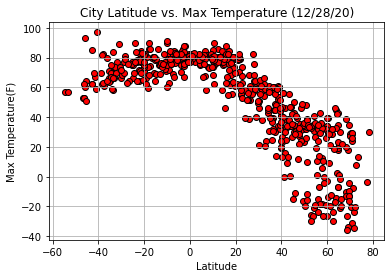

In [24]:
# Create first plot per starter file
x_values = cleanddrop_df["Lat"]
y_values = cleanddrop_df["Max Temp"]
plt.scatter(x_values, y_values, color="r", marker="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.title("City Latitude vs. Max Temperature (12/28/20)")
plt.grid()
plt.savefig("Output/LatvsTemp.png")
plt.show()

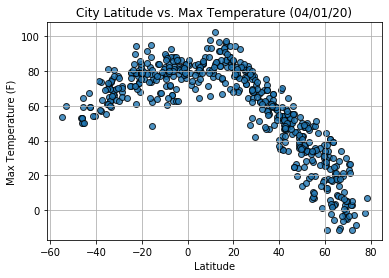

In [10]:
# Output from starter file

## Latitude vs. Humidity Plot

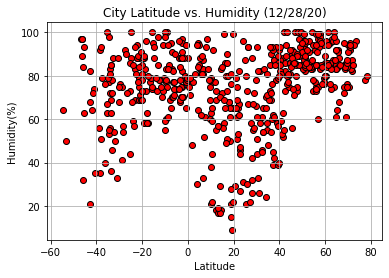

In [25]:
# Create 2nd plot per starter file
x_values = cleanddrop_df["Lat"]
y_values = cleanddrop_df["Humidity"]
plt.scatter(x_values, y_values, color="r", marker="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude vs. Humidity (12/28/20)")
plt.grid()
plt.savefig("Output/LatvsHumidity.png")
plt.show()

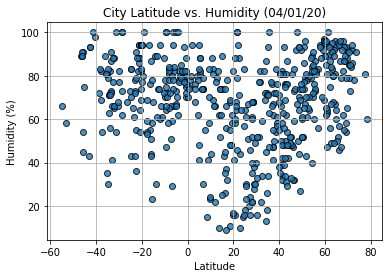

In [11]:
# Output from starter file

## Latitude vs. Cloudiness Plot

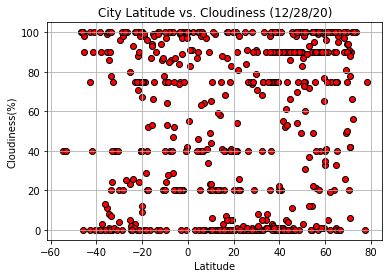

In [26]:
# Create 3rd plot per starter file
x_values = cleanddrop_df["Lat"]
y_values = cleanddrop_df["Cloudiness"]
plt.scatter(x_values, y_values, color="r", marker="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs. Cloudiness (12/28/20)")
plt.grid()
plt.savefig("Output/LatvsCloudiness.png")
plt.show()

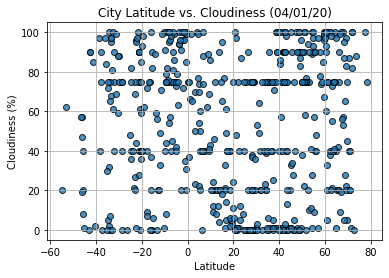

In [12]:
# Output from starter file

## Latitude vs. Wind Speed Plot

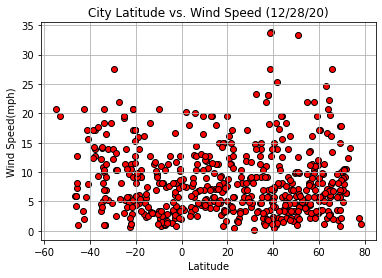

In [27]:
# Create 4th plot per starter file
x_values = cleanddrop_df["Lat"]
y_values = cleanddrop_df["Wind Speed"]
plt.scatter(x_values, y_values, color="r", marker="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title("City Latitude vs. Wind Speed (12/28/20)")
plt.grid()
plt.savefig("Output/LatvsWindSpeed.png")
plt.show()

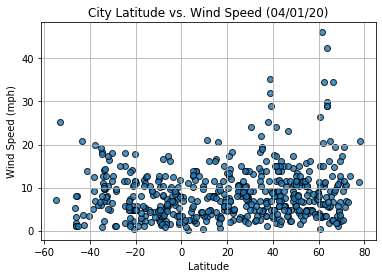

In [13]:
# Output from starter file

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [28]:
# Display DF
cleanddrop_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vila franca do campo,37.72,-25.43,59.00,87.0,75.0,23.04,PT,1.609623e+09
1,chokurdakh,70.63,147.92,-31.09,84.0,6.0,4.85,RU,1.609623e+09
2,cape town,-33.93,18.42,69.80,56.0,0.0,20.80,ZA,1.609623e+09
3,sitka,57.05,-135.33,42.80,60.0,90.0,16.11,US,1.609623e+09
4,suriapet,17.15,79.62,62.20,90.0,87.0,2.75,IN,1.609623e+09


In [65]:
# Filter for instances where "Lat" is positive to grab Northern Hemisphere
LatNorth_df = cleanddrop_df.loc[cleanddrop_df["Lat"] >= 0,:]
LatNorth_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vila franca do campo,37.72,-25.43,59.00,87.0,75.0,23.04,PT,1.609623e+09
1,chokurdakh,70.63,147.92,-31.09,84.0,6.0,4.85,RU,1.609623e+09
3,sitka,57.05,-135.33,42.80,60.0,90.0,16.11,US,1.609623e+09
4,suriapet,17.15,79.62,62.20,90.0,87.0,2.75,IN,1.609623e+09
6,ponta do sol,32.67,-17.10,59.00,54.0,75.0,9.17,PT,1.609623e+09


In [30]:
# Checking count
LatNorth_df.count()

City          376
Lat           376
Lng           376
Max Temp      376
Humidity      376
Cloudiness    376
Wind Speed    376
Country       376
Date          376
dtype: int64

The r-value is: -0.8313288018127849


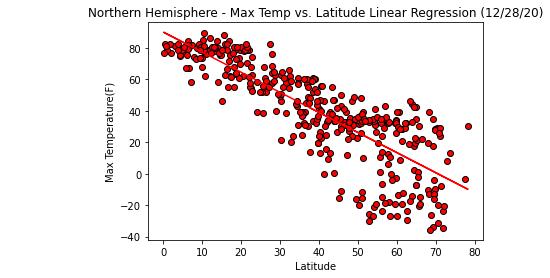

In [31]:
# Plotting regression on 1st plot, Northern Hemisphere
x_values = LatNorth_df["Lat"]
y_values = LatNorth_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, color="r", marker="o", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,-40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression (12/28/20)")
plt.savefig("Output/LatvsTemp - Regression - Northern Hem.png")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.46937863826630627


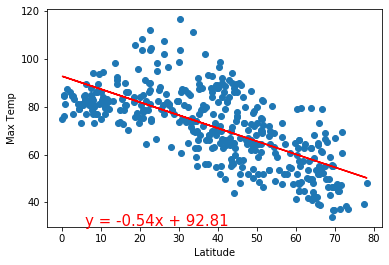

In [25]:
# Output from starter file

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [32]:
# Display DF
cleanddrop_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vila franca do campo,37.72,-25.43,59.00,87.0,75.0,23.04,PT,1.609623e+09
1,chokurdakh,70.63,147.92,-31.09,84.0,6.0,4.85,RU,1.609623e+09
2,cape town,-33.93,18.42,69.80,56.0,0.0,20.80,ZA,1.609623e+09
3,sitka,57.05,-135.33,42.80,60.0,90.0,16.11,US,1.609623e+09
4,suriapet,17.15,79.62,62.20,90.0,87.0,2.75,IN,1.609623e+09


In [33]:
# Filter for instances where "Lat" is negative to grab Southern Hemisphere
LatSouth_df = cleanddrop_df.loc[cleanddrop_df["Lat"] < 0,:]
LatSouth_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,cape town,-33.93,18.42,69.80,56.0,0.0,20.80,ZA,1.609623e+09
5,ushuaia,-54.80,-68.30,57.20,64.0,40.0,20.80,AR,1.609623e+09
10,mataura,-46.19,168.86,53.01,97.0,100.0,5.99,NZ,1.609623e+09
15,new norfolk,-42.78,147.06,62.01,68.0,100.0,1.99,AU,1.609623e+09
16,paramonga,-10.67,-77.83,70.93,79.0,78.0,9.66,PE,1.609623e+09


In [34]:
# Checking count
LatSouth_df.count()

City          186
Lat           186
Lng           186
Max Temp      186
Humidity      186
Cloudiness    186
Wind Speed    186
Country       186
Date          186
dtype: int64

The r-value is: 0.5161770799635147


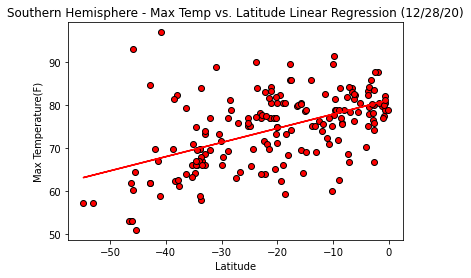

In [35]:
# Plotting regression on 1st plot, Southern Hemisphere
x_values = LatSouth_df["Lat"]
y_values = LatSouth_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, color="r", marker="o", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,100),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression (12/28/20)")
plt.savefig("Output/LatvsTemp - Regression - Southern Hem.png")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.6082708688906918


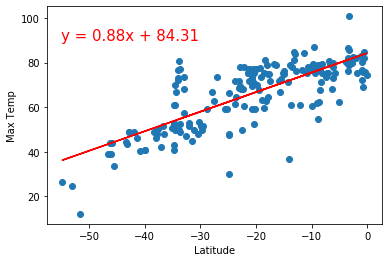

In [26]:
# Output from starter file

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [36]:
# Display DF
cleanddrop_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vila franca do campo,37.72,-25.43,59.00,87.0,75.0,23.04,PT,1.609623e+09
1,chokurdakh,70.63,147.92,-31.09,84.0,6.0,4.85,RU,1.609623e+09
2,cape town,-33.93,18.42,69.80,56.0,0.0,20.80,ZA,1.609623e+09
3,sitka,57.05,-135.33,42.80,60.0,90.0,16.11,US,1.609623e+09
4,suriapet,17.15,79.62,62.20,90.0,87.0,2.75,IN,1.609623e+09


In [37]:
# Filter for instances where "Lat" is positive to grab Northern Hemisphere
LatNorthHum_df = cleanddrop_df.loc[cleanddrop_df["Lat"] >= 0,:]
LatNorthHum_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vila franca do campo,37.72,-25.43,59.00,87.0,75.0,23.04,PT,1.609623e+09
1,chokurdakh,70.63,147.92,-31.09,84.0,6.0,4.85,RU,1.609623e+09
3,sitka,57.05,-135.33,42.80,60.0,90.0,16.11,US,1.609623e+09
4,suriapet,17.15,79.62,62.20,90.0,87.0,2.75,IN,1.609623e+09
6,ponta do sol,32.67,-17.10,59.00,54.0,75.0,9.17,PT,1.609623e+09


In [38]:
# Checking count
LatNorthHum_df.count()

City          376
Lat           376
Lng           376
Max Temp      376
Humidity      376
Cloudiness    376
Wind Speed    376
Country       376
Date          376
dtype: int64

The r-value is: 0.44698956356559355


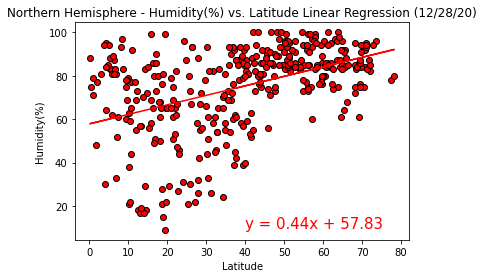

In [39]:
# Plotting regression on 2nd plot, Northern Hemisphere
x_values = LatNorthHum_df["Lat"]
y_values = LatNorthHum_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, color="r", marker="o", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression (12/28/20)")
plt.savefig("Output/LatvsHumidity - Regression - Northern Hem.png")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.000543987878808455


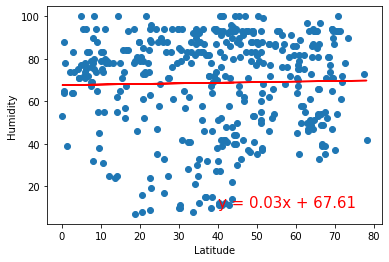

In [27]:
# Output from starter file

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [40]:
# Display DF
cleanddrop_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vila franca do campo,37.72,-25.43,59.00,87.0,75.0,23.04,PT,1.609623e+09
1,chokurdakh,70.63,147.92,-31.09,84.0,6.0,4.85,RU,1.609623e+09
2,cape town,-33.93,18.42,69.80,56.0,0.0,20.80,ZA,1.609623e+09
3,sitka,57.05,-135.33,42.80,60.0,90.0,16.11,US,1.609623e+09
4,suriapet,17.15,79.62,62.20,90.0,87.0,2.75,IN,1.609623e+09


In [41]:
# Filter for instances where "Lat" is negative to grab Southern Hemisphere
LatSouthHum_df = cleanddrop_df.loc[cleanddrop_df["Lat"] < 0,:]
LatSouthHum_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,cape town,-33.93,18.42,69.80,56.0,0.0,20.80,ZA,1.609623e+09
5,ushuaia,-54.80,-68.30,57.20,64.0,40.0,20.80,AR,1.609623e+09
10,mataura,-46.19,168.86,53.01,97.0,100.0,5.99,NZ,1.609623e+09
15,new norfolk,-42.78,147.06,62.01,68.0,100.0,1.99,AU,1.609623e+09
16,paramonga,-10.67,-77.83,70.93,79.0,78.0,9.66,PE,1.609623e+09


In [42]:
# Checking count
LatSouthHum_df.count()

City          186
Lat           186
Lng           186
Max Temp      186
Humidity      186
Cloudiness    186
Wind Speed    186
Country       186
Date          186
dtype: int64

The r-value is: 0.28118576452450145


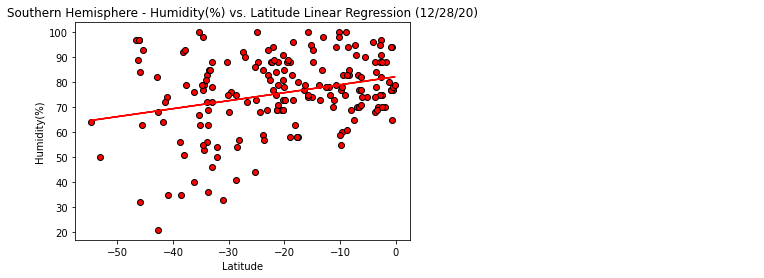

In [43]:
# Plotting regression on 2nd plot, Southern Hemisphere
x_values = LatSouthHum_df["Lat"]
y_values = LatSouthHum_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, color="r", marker="o", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression (12/28/20)")
plt.savefig("Output/LatvsHumidity - Regression - Southern Hem.png")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.014985174297345524


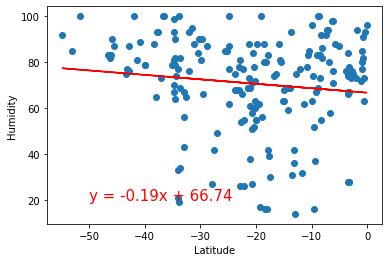

In [28]:
# Output from starter file

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [44]:
# Display DF
cleanddrop_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vila franca do campo,37.72,-25.43,59.00,87.0,75.0,23.04,PT,1.609623e+09
1,chokurdakh,70.63,147.92,-31.09,84.0,6.0,4.85,RU,1.609623e+09
2,cape town,-33.93,18.42,69.80,56.0,0.0,20.80,ZA,1.609623e+09
3,sitka,57.05,-135.33,42.80,60.0,90.0,16.11,US,1.609623e+09
4,suriapet,17.15,79.62,62.20,90.0,87.0,2.75,IN,1.609623e+09


In [45]:
# Filter for instances where "Lat" is positive to grab Northern Hemisphere
LatNorthCloud_df = cleanddrop_df.loc[cleanddrop_df["Lat"] >= 0,:]
LatNorthCloud_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vila franca do campo,37.72,-25.43,59.00,87.0,75.0,23.04,PT,1.609623e+09
1,chokurdakh,70.63,147.92,-31.09,84.0,6.0,4.85,RU,1.609623e+09
3,sitka,57.05,-135.33,42.80,60.0,90.0,16.11,US,1.609623e+09
4,suriapet,17.15,79.62,62.20,90.0,87.0,2.75,IN,1.609623e+09
6,ponta do sol,32.67,-17.10,59.00,54.0,75.0,9.17,PT,1.609623e+09


In [46]:
# Checking count
LatNorthCloud_df.count()

City          376
Lat           376
Lng           376
Max Temp      376
Humidity      376
Cloudiness    376
Wind Speed    376
Country       376
Date          376
dtype: int64

The r-value is: 0.27277239100281625


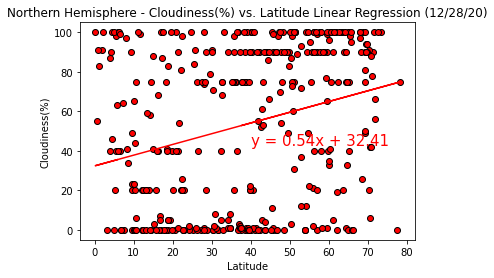

In [47]:
# Plotting regression on 3rd plot, Northern Hemisphere
x_values = LatNorthCloud_df["Lat"]
y_values = LatNorthCloud_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, color="r", marker="o", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,43),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("Northern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression (12/28/20)")
plt.savefig("Output/LatvsCloudiness - Regression - Northern Hem.png")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.0020898727664228514


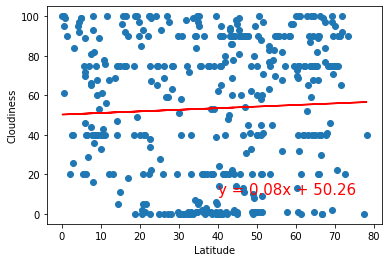

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [48]:
# Display DF
cleanddrop_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vila franca do campo,37.72,-25.43,59.00,87.0,75.0,23.04,PT,1.609623e+09
1,chokurdakh,70.63,147.92,-31.09,84.0,6.0,4.85,RU,1.609623e+09
2,cape town,-33.93,18.42,69.80,56.0,0.0,20.80,ZA,1.609623e+09
3,sitka,57.05,-135.33,42.80,60.0,90.0,16.11,US,1.609623e+09
4,suriapet,17.15,79.62,62.20,90.0,87.0,2.75,IN,1.609623e+09


In [49]:
# Filter for instances where "Lat" is negative to grab Southern Hemisphere
LatSouthCloud_df = cleanddrop_df.loc[cleanddrop_df["Lat"] < 0,:]
LatSouthCloud_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,cape town,-33.93,18.42,69.80,56.0,0.0,20.80,ZA,1.609623e+09
5,ushuaia,-54.80,-68.30,57.20,64.0,40.0,20.80,AR,1.609623e+09
10,mataura,-46.19,168.86,53.01,97.0,100.0,5.99,NZ,1.609623e+09
15,new norfolk,-42.78,147.06,62.01,68.0,100.0,1.99,AU,1.609623e+09
16,paramonga,-10.67,-77.83,70.93,79.0,78.0,9.66,PE,1.609623e+09


In [50]:
# Checking count
LatSouthCloud_df.count()

City          186
Lat           186
Lng           186
Max Temp      186
Humidity      186
Cloudiness    186
Wind Speed    186
Country       186
Date          186
dtype: int64

The r-value is: 0.17349882006662776


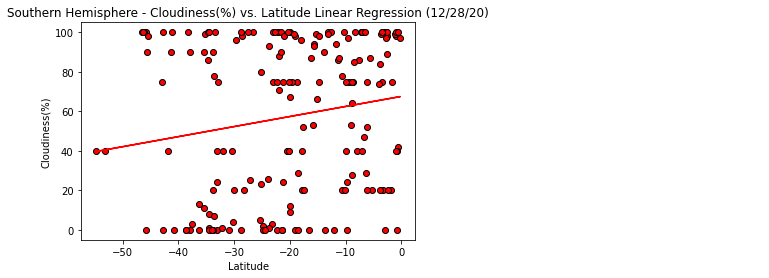

In [51]:
# Plotting regression on 3rd plot, Southern Hemisphere
x_values = LatSouthCloud_df["Lat"]
y_values = LatSouthCloud_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, color="r", marker="o", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,43),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("Southern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression (12/28/20)")
plt.savefig("Output/LatvsCloudiness - Regression - Southern Hem.png")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.0035263772085582894


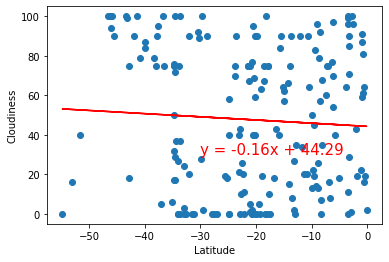

In [30]:
# Output from starter file

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [52]:
# Display DF
cleanddrop_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vila franca do campo,37.72,-25.43,59.00,87.0,75.0,23.04,PT,1.609623e+09
1,chokurdakh,70.63,147.92,-31.09,84.0,6.0,4.85,RU,1.609623e+09
2,cape town,-33.93,18.42,69.80,56.0,0.0,20.80,ZA,1.609623e+09
3,sitka,57.05,-135.33,42.80,60.0,90.0,16.11,US,1.609623e+09
4,suriapet,17.15,79.62,62.20,90.0,87.0,2.75,IN,1.609623e+09


In [53]:
# Filter for instances where "Lat" is positive to grab Northern Hemisphere
LatNorthWind_df = cleanddrop_df.loc[cleanddrop_df["Lat"] >= 0,:]
LatNorthWind_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vila franca do campo,37.72,-25.43,59.00,87.0,75.0,23.04,PT,1.609623e+09
1,chokurdakh,70.63,147.92,-31.09,84.0,6.0,4.85,RU,1.609623e+09
3,sitka,57.05,-135.33,42.80,60.0,90.0,16.11,US,1.609623e+09
4,suriapet,17.15,79.62,62.20,90.0,87.0,2.75,IN,1.609623e+09
6,ponta do sol,32.67,-17.10,59.00,54.0,75.0,9.17,PT,1.609623e+09


In [54]:
# Checking count
LatNorthWind_df.count()

City          376
Lat           376
Lng           376
Max Temp      376
Humidity      376
Cloudiness    376
Wind Speed    376
Country       376
Date          376
dtype: int64

The r-value is: -0.017052053691573973


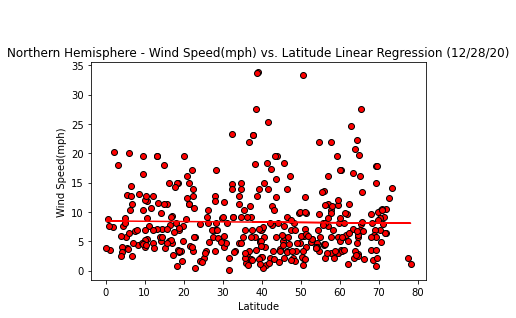

In [55]:
# Plotting regression on 4th plot, Northern Hemisphere
x_values = LatNorthWind_df["Lat"]
y_values = LatNorthWind_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, color="r", marker="o", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,43),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title("Northern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression (12/28/20)")
plt.savefig("Output/LatvsWindSpeed - Regression - Northern Hem.png")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.04019723576144484


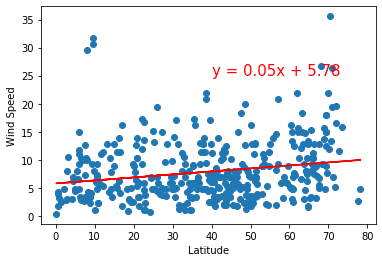

In [31]:
# Output from starter file

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [56]:
# Display DF
cleanddrop_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vila franca do campo,37.72,-25.43,59.00,87.0,75.0,23.04,PT,1.609623e+09
1,chokurdakh,70.63,147.92,-31.09,84.0,6.0,4.85,RU,1.609623e+09
2,cape town,-33.93,18.42,69.80,56.0,0.0,20.80,ZA,1.609623e+09
3,sitka,57.05,-135.33,42.80,60.0,90.0,16.11,US,1.609623e+09
4,suriapet,17.15,79.62,62.20,90.0,87.0,2.75,IN,1.609623e+09


In [57]:
# Filter for instances where "Lat" is negative to grab Southern Hemisphere
LatSouthWind_df = cleanddrop_df.loc[cleanddrop_df["Lat"] < 0,:]
LatSouthWind_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,cape town,-33.93,18.42,69.80,56.0,0.0,20.80,ZA,1.609623e+09
5,ushuaia,-54.80,-68.30,57.20,64.0,40.0,20.80,AR,1.609623e+09
10,mataura,-46.19,168.86,53.01,97.0,100.0,5.99,NZ,1.609623e+09
15,new norfolk,-42.78,147.06,62.01,68.0,100.0,1.99,AU,1.609623e+09
16,paramonga,-10.67,-77.83,70.93,79.0,78.0,9.66,PE,1.609623e+09


In [58]:
# Checking count
LatSouthWind_df.count()

City          186
Lat           186
Lng           186
Max Temp      186
Humidity      186
Cloudiness    186
Wind Speed    186
Country       186
Date          186
dtype: int64

The r-value is: -0.3188779709636928


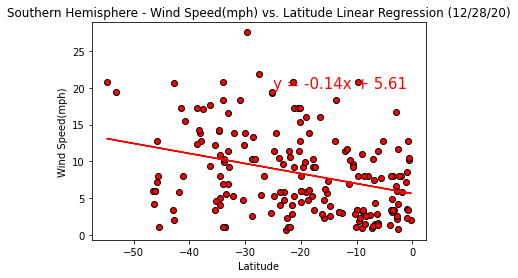

In [59]:
# Plotting regression on 4th plot, Southern Hemisphere
x_values = LatSouthWind_df["Lat"]
y_values = LatSouthWind_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, color="r", marker="o", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title("Southern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression (12/28/20)")
plt.savefig("Output/LatvsWindSpeed - Regression - Southern Hem.png")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.017128274759839232


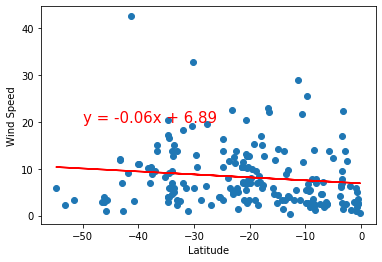

In [32]:
# Output from starter file